<a href="https://colab.research.google.com/github/tyagiayush9212/Mango-Leaf-Detection/blob/main/DTI_Prototype(Model_Building).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mango Leaf disease detection using CNN



In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import glob
import cv2
import os
import matplotlib.image as mpimg
import random
from sklearn import preprocessing
import tensorflow.keras as keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Image augmentation and Pre-processing


In [ ]:
directory_root = "/content/drive/MyDrive/Mango-Leaf-Dataset"

In [ ]:
SIZE = 256

#Using seeds for train,test and validation models to prevent randomness and shuffling

SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164

CHANNELS = 3
n_classes = 3
#Epoch implies one complete pass of the training dataset through the algorithm.
EPOCHS = 50

BATCH_SIZE = 16   #Number of training examples utilized in one iteration
input_shape = (SIZE , SIZE , CHANNELS)

IMG_SHAPE = 50

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    featurewise_center = True,     #standardization
    featurewise_std_normalization = True
)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=directory_root,
                                                     shuffle=True,
                                                     color_mode = 'rgb',
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

#Identifies classes of images in the dataset


Found 4000 images belonging to 8 classes.


In [ ]:
#Indexing the classes present:
train_data_gen.class_indices

{'Anthracnose': 0,
 'Bacterial Canker': 1,
 'Cutting Weevil': 2,
 'Die Back': 3,
 'Gall Midge': 4,
 'Healthy': 5,
 'Powdery Mildew': 6,
 'Sooty Mould': 7}

In [ ]:
#Function for data (image) visualization using matplotlib
def plotImages(images_arr):
  fig , axes = plt.subplots(1,5,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


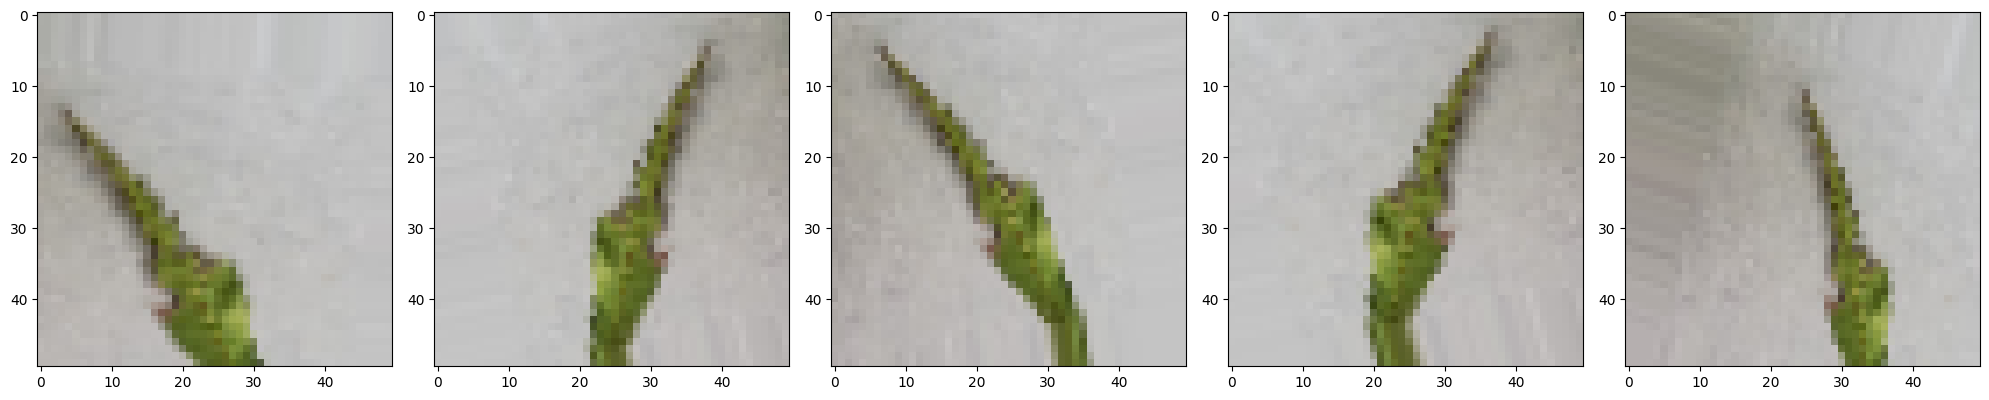

In [ ]:
import matplotlib.pyplot as plt
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
# augmenting images for validation test and train models:
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#Using tensorflow:
train_generator = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/Mango-Leaf-Dataset",
    #This is the input directory of our dataset
    batch_size = BATCH_SIZE, #Resizing image to 64x64

    color_mode = 'rgb'
)
validation_generator =  tf.keras.utils.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/Mango-Leaf-Dataset",
    batch_size = BATCH_SIZE,

    color_mode = 'rgb'
)
test_generator = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/Mango-Leaf-Dataset",
    batch_size = BATCH_SIZE,

    color_mode = 'rgb'
)


Found 4000 files belonging to 8 classes.
Found 4000 files belonging to 8 classes.
Found 4000 files belonging to 8 classes.


#Creating the model


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
from keras import Sequential
from keras import layers

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding = 'same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32,3,padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64,3,padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(128,3,padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256,activation='relu'),

    #Implementing final output as probability of the present 8 classes and amongst them the maximum one will be selected which closely relates to the disease

    layers.Dense(8, activation='softmax')

])

In [ ]:
#Model Training Blueprint
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
#"accuracy" measures how often the model's predictions match the actual labels during training.


In [ ]:
#Training our model:
history = model.fit(train_generator, batch_size = 32, validation_batch_size = 32, validation_data=validation_generator,epochs = 10)


Epoch 1/10
250/250 [==============================] - 566s 2s/step - loss: 2.0361 - accuracy: 0.2030 - val_loss: 1.1641 - val_accuracy: 0.5870
Epoch 2/10
250/250 [==============================] - 523s 2s/step - loss: 0.8368 - accuracy: 0.6810 - val_loss: 0.6489 - val_accuracy: 0.7520
Epoch 3/10
250/250 [==============================] - 510s 2s/step - loss: 0.4860 - accuracy: 0.8257 - val_loss: 0.5167 - val_accuracy: 0.7985
Epoch 4/10
250/250 [==============================] - 514s 2s/step - loss: 0.4123 - accuracy: 0.8593 - val_loss: 0.2643 - val_accuracy: 0.9112
Epoch 5/10
250/250 [==============================] - 540s 2s/step - loss: 0.3027 - accuracy: 0.8990 - val_loss: 0.1610 - val_accuracy: 0.9597
Epoch 6/10
250/250 [==============================] - 531s 2s/step - loss: 0.2532 - accuracy: 0.9162 - val_loss: 0.1690 - val_accuracy: 0.9463
Epoch 7/10
250/250 [==============================] - 523s 2s/step - loss: 0.2071 - accuracy: 0.9265 - val_loss: 0.1251 - val_accuracy: 0.9588

In [ ]:
model.summary()    #Final accuracy : 97.70%

NameError: name 'model' is not defined

In [ ]:
#Saving the trained model:
model.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
model = load_model('/content/trained_model.h5')
acc = model.evaluate_generator(validation_generator)[1]
print(f"The accuracy of your trained model is: {acc*100}%")

<ipython-input-16-4f114a9875b7>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(validation_generator)[1]


The accuracy of your trained model is: 96.72499895095825%


#Predicting the disease (Under-Development)


In [ ]:
from keras.preprocessing.image import img_to_array , load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

reference = dict(zip(list(train_data_gen.class_indices.values()) , list(train_data_gen.class_indices.keys())))
def predict_disease(path):
  img = load_img(path, target_size = (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis = 0)
  pred = np.argmax(model.predict(img))
  print(f" the image belongs to { reference[pred] }")

In [ ]:
path = '/content/drive/MyDrive/Mango-Leaf-Dataset/Gall Midge/IMG_20211106_161058 (Custom).jpg'
predict_disease(path)


NameError: name 'predict_disease' is not defined